In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def read_results(results_dir):
    
    # read arrays
    val_preds = np.load(os.path.join(results_dir,  'val_predictions.npy'))
    val_obs = np.load(os.path.join(results_dir,  'val_targets.npy'))
    
    # reshape arrays
    val_preds = val_preds.squeeze().transpose(1, 0, 2)
    val_obs = val_obs.squeeze().transpose(1, 0, 2)

    return val_preds, val_obs

In [34]:
gino_vl_dir = '/srv/scratch/z5370003/projects/results/04_groundwater/variable_density/GINO_predictions/forcing/gino_predictions_20260117_120324'
gino_dir = '/srv/scratch/z5370003/projects/results/04_groundwater/variable_density/GINO_predictions/forcing_standard_loss/gino_predictions_20260117_115735'
fno_dir = '/srv/scratch/z5370003/projects/results/04_groundwater/variable_density/FNO_predictions/forcing/fno_predictions_20260117_130905'

gino_vl_preds, gino_vl_obs = read_results(gino_vl_dir)
gino_preds, gino_obs = read_results(gino_dir)
fno_preds, fno_obs = read_results(fno_dir)

In [35]:
def compute_mae(x, y):
    mae = []
    for idx in range(y.shape[-1]):
        mae.append(np.mean(np.abs(x[...,idx] - y[...,idx]), axis=-1))
    return np.array(mae)


def compute_var(y):
    var = []
    for idx in range(y.shape[-1]):
        var.append(np.var(y[...,idx], axis=-1))
    return tuple(var)

In [36]:
fno_mae = compute_mae(fno_preds, fno_obs)
gino_mae = compute_mae(gino_preds, gino_obs)
gino_vl_mae = compute_mae(gino_vl_preds, gino_vl_obs)

# obs_var = compute_var(obs)

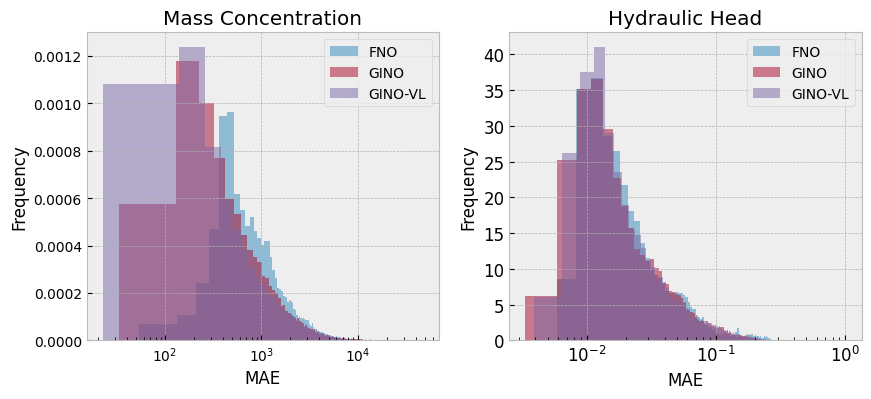

In [37]:
import matplotlib as mpl

mpl.style.use('bmh')

target_cols = ['Mass Concentration', 'Hydraulic Head']

fig, ax = plt.subplots(1, len(target_cols), figsize=(10, 4))

for col_idx, col_name in enumerate(target_cols):

    ax[col_idx].hist(fno_mae[col_idx], bins=400, label='FNO', alpha=0.5, density=True)
    ax[col_idx].hist(gino_mae[col_idx], bins=400, label='GINO', alpha=0.5, density=True)
    ax[col_idx].hist(gino_vl_mae[col_idx], bins=400, label='GINO-VL', alpha=0.5, density=True)
    ax[col_idx].legend()
    ax[col_idx].set_ylabel('Frequency')
    # if col_idx == (len(target_cols)-1):
    ax[col_idx].set_xlabel('MAE')
    ax[col_idx].set_xscale('log')
    ax[col_idx].set_title(f"{col_name}")
    
    
    # ax[col_idx, 1].scatter(obs_var[col_idx], fno_mae[col_idx], s=3, label='FNO', alpha=0.6)
    # ax[col_idx, 1].scatter(obs_var[col_idx], gino_mae[col_idx], s=3, label='GINO', alpha=0.6)
    # ax[col_idx, 1].scatter(obs_var[col_idx], gino_vl_mae[col_idx], s=3, label='GINO-VL', alpha=0.6)
    # ax[col_idx, 1].legend()
    # if col_idx == (len(target_cols)-1):
    #     ax[col_idx, 1].set_xlabel('Temporal Variance')
    # ax[col_idx, 1].set_ylabel('MAE')
    # ax[col_idx, 1].set_xscale('log')
    # ax[col_idx, 1].set_title(f"{col_name}")

plt.xticks(fontsize=12)
_=plt.yticks(fontsize=12)
fig.savefig('high_res_hist_comparison.png', bbox_inches='tight')

In [7]:
import scipy

In [40]:
(fno_obs == gino_obs).all()

True

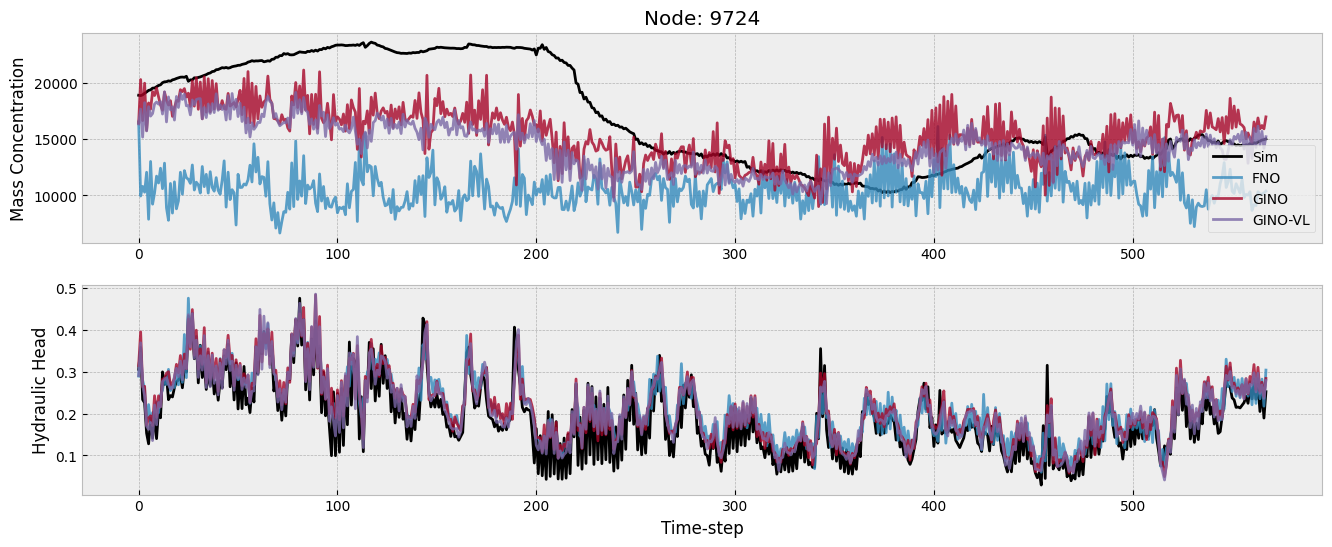

In [38]:
# randn_idx = np.random.choice(np.arange(len(obs)), p=scipy.special.softmax(obs_var[0]))
randn_idx = np.argsort(obs_var[0])[int(len(obs)/8*7.94)]
# randn_idx = 3271

fig, ax = plt.subplots(len(target_cols), 1,  figsize=(16, 6))


for col_idx, col_name in enumerate(target_cols):

    ax[col_idx].plot(fno_obs[randn_idx, :, col_idx], label='Sim', c='black')
    ax[col_idx].plot(fno_preds[randn_idx, :, col_idx], label='FNO',  alpha=0.8)
    ax[col_idx].plot(gino_preds[randn_idx, :, col_idx], label='GINO',  alpha=0.8)
    ax[col_idx].plot(gino_vl_preds[randn_idx, :, col_idx], label='GINO-VL', alpha=0.8)

    if col_idx==0:
        ax[col_idx].legend(loc=1, bbox_to_anchor=(1, 0.5))
        ax[col_idx].set_title(f"Node: {randn_idx+1}")
    else:
        ax[col_idx].set_xlabel('Time-step')
        
    ax[col_idx].set_ylabel(col_name)
    # if col_idx == (len(target_cols)-1):

    # ax[col_idx].set_yscale('log')

fig.savefig('lineplot.png', bbox_inches='tight')


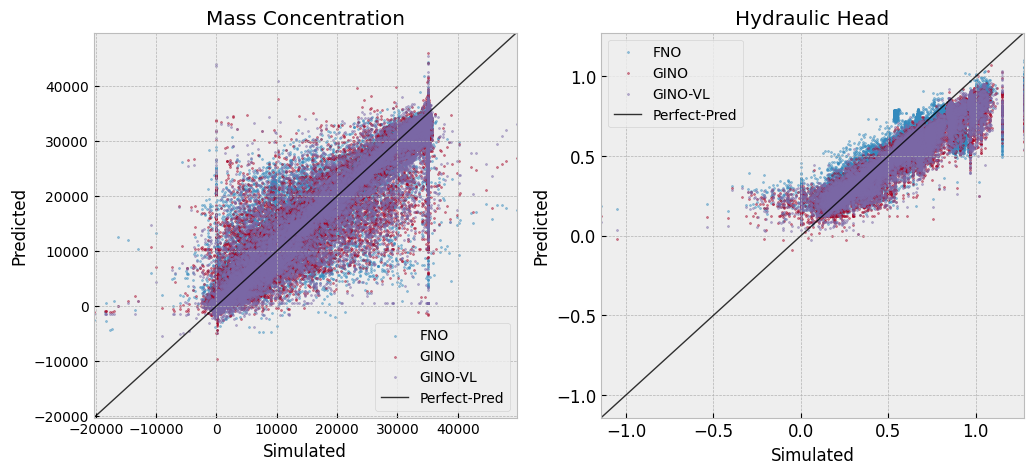

In [33]:
fig, ax = plt.subplots(1, len(target_cols),  figsize=(12, 5))


for col_idx, col_name in enumerate(target_cols):

    low_lim = min(obs[:, -1, col_idx].min(), fno_preds[:, -1, col_idx].min())
    up_lim = max(obs[:, -1, col_idx].max(), fno_preds[:, -1, col_idx].max())
    x = np.linspace(low_lim, up_lim, 100)
    

    ax[col_idx].scatter(obs[:, -1, col_idx].flatten(), fno_preds[:, -1, col_idx].flatten(), s=2, label='FNO', alpha=0.5)
    ax[col_idx].scatter(obs[:, -1, col_idx].flatten(), gino_preds[:, -1, col_idx].flatten(), s=2, label='GINO', alpha=0.5)
    ax[col_idx].scatter(obs[:, -1, col_idx].flatten(), gino_vl_preds[:, -1, col_idx].flatten(), s=2, label='GINO-VL', alpha=0.5)
    ax[col_idx].plot(x, x, label='Perfect-Pred', linewidth=1, c='black', alpha=0.8)


    ax[col_idx].set_xlim(low_lim, up_lim)
    ax[col_idx].set_ylim(low_lim, up_lim)

    ax[col_idx].set_xlabel('Simulated')
    ax[col_idx].set_ylabel('Predicted')
    ax[col_idx].legend()
        
    ax[col_idx].set_title(col_name)

plt.xticks(fontsize=12)
_=plt.yticks(fontsize=12)

fig.savefig('scatterplot.png', bbox_inches='tight')